#### k466l3 5ubm15510n m4rk 1

kaggle submission for dogs-cats-redux using a finetuned VGG algorithm

In [12]:
#Verify we are in the lesson1 directory 
%pwd

u'G:\\000. UCD- Data Science\\Research Project\\deeplearningprojects\\Redux'

In [72]:
#Changing to the dataset folder stored on the local hard-drive
#Create references to important directories we will use over and over
import os, sys
os.chdir(r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\\')
os.getcwd()

current_dir = os.getcwd()
path = current_dir+'\\data\\base_dataset\\'
print(path)

G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\


In [6]:
# Adding utils and VGG python modules
sys.path.insert(0, r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\utils')

import utils; reload(utils)
from utils import plots

Using cuDNN version 5110 on context None
Mapped name None to device cuda0: GeForce 830M (0000:0A:00.0)
Using Theano backend.


In [73]:
#============================= VALIDATION SET ==============================#
# Creating a validation set

# Creating directories
%cd "G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\"
%mkdir valid
%mkdir results
%mkdir "sample/train"
%mkdir "sample/test"
%mkdir "sample/valid"
%mkdir "sample/results"
%mkdir "test/unknown"

G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset


In [32]:
## Creating a validation dataset to test the algorithm
#=========================================================#

In [81]:
%cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\train
%pwd

G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\train


u'G:\\000. UCD- Data Science\\Research Project\\deeplearningprojects\\Redux\\data\\base_dataset\\train'

In [84]:
path_dir = r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset'
print(path_dir)

G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset


In [85]:
# Creating a validation dataset
#==============================
import glob
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
# Check out os.rename
for i in range(2000): os.rename(shuf[i], path_dir+'/valid/' + shuf[i])

In [86]:
# Creating a sample dataset
#=============================
from shutil import copyfile

In [88]:
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], path_dir+'/sample/train/' + shuf[i])

In [93]:
# Creating a validation folder inside the sample directory
%cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\valid\

G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\valid


In [94]:
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], path_dir+'/sample/valid/' + shuf[i])

#### Rearranging the labels as directries as required by keras

In [107]:
# %cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\sample\train
# %mkdir cats
# %mkdir dogs
# !MOVE cat*.jpg cats/
# !MOVE dog*.jpg dogs/

# %cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\sample\valid
# %mkdir cats
# %mkdir dogs
# !MOVE cat*.jpg cats/
# !MOVE dog*.jpg dogs/

# %cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\valid
# %mkdir cats
# %mkdir dogs
# !MOVE cat*.jpg cats/
# !MOVE dog*.jpg dogs/

# %cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\train
# %mkdir cats
# %mkdir dogs
# !MOVE cat*.jpg cats/
# !MOVE dog*.jpg dogs/


In [109]:
# Create single 'unknown' class for test set
%cd G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\test
!mv *.jpg unknown/

G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\test


In [110]:
####Finetuning and Training the VGG16

In [145]:
#Setting the path of the dataset to work with 
# We start with testing on the sample dataset

# test_path = r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\sample\test' 
# results_path=r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\sample\results'
# train_path=r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\sample\train'
# valid_path=r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\sample\valid'
# print(train_path)
# print(test_path)

# Running with the full dataset
test_path = r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\test' 
results_path=r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\results'
train_path=r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\train'
valid_path=r'G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\valid'
print(train_path)
print(test_path)




G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\train
G:\000. UCD- Data Science\Research Project\deeplearningprojects\Redux\data\base_dataset\test


In [146]:
#import Vgg16 helper class
vgg = Vgg16()

In [149]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=4
no_of_epochs=2

In [150]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [152]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 2562s - loss: 0.5384 - acc: 0.9633 - val_loss: 0.2974 - val_acc: 0.9805
Running epoch: 1
Epoch 1/1
 7824/23000 [=========>....................] - ETA: 1598s - loss: 0.5509 - acc: 0.9640

KeyboardInterrupt: 

#### Validating predictions

Keras' fit() function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("epoch" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting.

Tip: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).
As well as looking at the overall metrics, it's also a good idea to look at examples of each of:

A few correct labels at random
A few incorrect labels at random
The most correct labels of each class (ie those with highest probability that are correct)
The most incorrect labels of each class (ie those with highest probability that are incorrect)
The most uncertain labels (ie those with probability closest to 0.5).
Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [121]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [122]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [123]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [132]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path +'\\'+ filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 50 correct labels


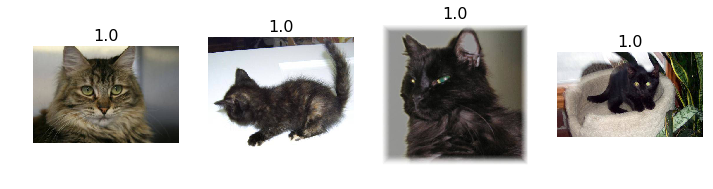

In [133]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

In [142]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 0 incorrect labels


IndexError: list index out of range

Found 22 confident correct cats labels


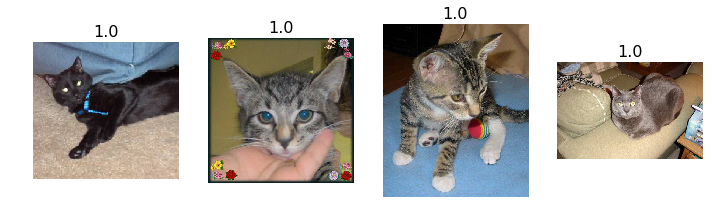

In [135]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 28 confident correct dogs labels


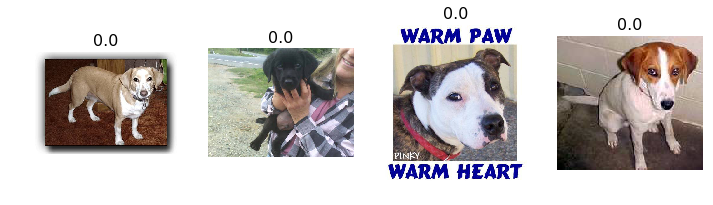

In [136]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

In [137]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 0 incorrect cats


In [138]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

Found 0 incorrect dogs


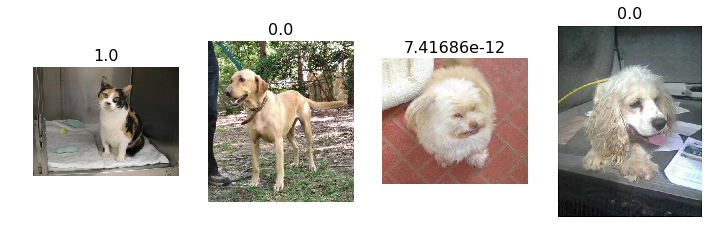

In [139]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [140]:
## Plotting a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[22  0]
 [ 0 28]]


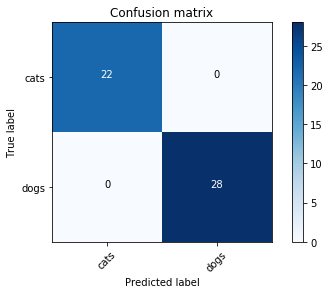

In [141]:
# Graphical view of the confusion matrix
plot_confusion_matrix(cm, val_batches.class_indices)